# Writing your own Neural Network code

In [1]:
# import
import autograd.numpy as np 

# custom imports
from neural_network import create_layers, create_layers_batch, backpropagation, backpropagation_batch, feed_forward, feed_forward_batch
from cost_functions import mse, mse_derivative
from activation_functions import sigmoid, sigmoid_derivative, RELU, RELU_derivative, linear, linear_derivative
from runge_preprocessing import y_noise, x, y, x_train_scaled, y_train, RUNGE_HIDDEN_LAYERS, y_test

Before reshaping
x (1000,)
y_noise (1000,)
x_train (800,)
y_train (800,)
x_train_scaled (800,)
x_test_scaled (200,)
y_train (800,)
After reshaping
x (1000,)
y_noise (1000,)
x_train (800,)
y_train (800, 1)
x_train_scaled (800, 1)
x_test_scaled (200, 1)
y_train (800, 1)


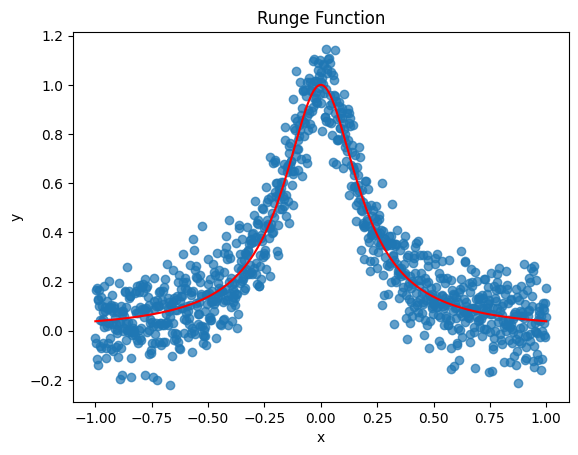

In [2]:
# Plotting, might be removed later

import matplotlib.pyplot as plt
plt.scatter(x, y_noise, alpha=0.7)
plt.plot(x, y, color='red')
plt.title("Runge Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
# Parameters for task b

# ---> see lecture notes week 43 about activation function, useful for choosing activation functions

# Settings for this task
network_input_size = x_train_scaled.shape[1]   # ----> should be the same as number of features
output_dim = 1 if y_test.ndim == 1 else y_test.shape[1] 
layer_output_sizes = [*RUNGE_HIDDEN_LAYERS, output_dim]

# create activation functions list - sigmoid and end with linear for regression
num_layers = len(layer_output_sizes)
activation_functions = [sigmoid] * (num_layers - 1) + [linear] 
activation_functions_derivatives = [sigmoid_derivative] * (num_layers - 1) + [linear_derivative]



layers = create_layers_batch(network_input_size, layer_output_sizes)
gradients = backpropagation_batch(x_train_scaled, layers, activation_functions, y_train, activation_functions_derivatives, cost_der=mse_derivative)



#for i in layers:
#    print(i[0].shape)

# Just a sanity check to see in feed forward works   --- remove it later
#predictions = feed_forward_batch(x_train_scaled, layers, activation_functions)
#for i in predictions:
#    print(i[0].shape, i[1].shape)
#print(predictions)


#gradients = backpropagation_batch(x_train_scaled, layers, activation_functions, y_train_scaled, activation_functions_derivatives, cost_der=mse_derivative) --> scaled y
# Just a sanity check to see in feed forward works   --- remove it later
#for i in gradients:
#    print(i[0].shape, i[1].shape)
#print(gradients)

